In [1]:
from instruments.Pulse import Pulse
from instruments.PulseSequence import PulseSequence
from instruments.DataChannelManager import DataChannelManager

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
from instruments.ATS9872_driver import * # alazar
from instruments.DG645_driver import * # delay generator
from instruments.M8195A_driver import * # awg
from instruments.E8257D_driver import * #RF source
from instruments.Agilent11713C_driver import * # attenuator
from instruments.SIM928_driver import * # Voltage source
from instruments.SIM970_driver import * # Voltage meter


In [3]:
awg = M8195A_driver('169.254.101.100')

In [4]:
awg.set_sampleRate(awg.get_sampleRate())
awg.getError()

In [5]:

dg = DG645_driver('TCPIP0::169.254.101.106::inst0::INSTR') # Delay generator
alazar = ATS9872_driver()

att = Agilent11713C_driver('TCPIP0::169.254.101.101::inst0::INSTR')
RFsourceMeasurement = E8257D_driver('TCPIP0::169.254.101.103::inst0::INSTR')
RFsourceExcitation = E8257D_driver('TCPIP0::169.254.101.104::inst0::INSTR')
Voltsource = SIM928_driver('GPIB0::2::INSTR',8,step_time=0.1,step_voltage=0.001) # voltsouce step_time, step_voltage
Voltmeter = SIM970_driver('GPIB0::2::INSTR',5)

In [6]:
p1 = Pulse(length = 100e-9,
           amplitude = 1,
           frequency = 5012e6,
           phase = 0,
           envelope='gaussian')

p2 = Pulse(length = 200e-9,
           amplitude = 1,
           frequency = 5012e6,
           phase = 90,
           envelope='gaussian')

p3 = Pulse(length = 100e-9,
           amplitude = 1,
           frequency = 5012e6,
           phase = 0,
           envelope='gaussian')

mp = Pulse(length = 5e-6,
           amplitude = 1,
           phase = 0,
           frequency = 7400e6)

In [7]:
s1 = PulseSequence("transmon3D")

In [8]:
s1.clear()

In [9]:
s1.add(p1,'q1',1e-6)
s1.add(p2,'q1',1e-6)
s1.add(p3,'q1')
s1.add(mp,'m1')

In [10]:
s1.startup_delay = 1e-6

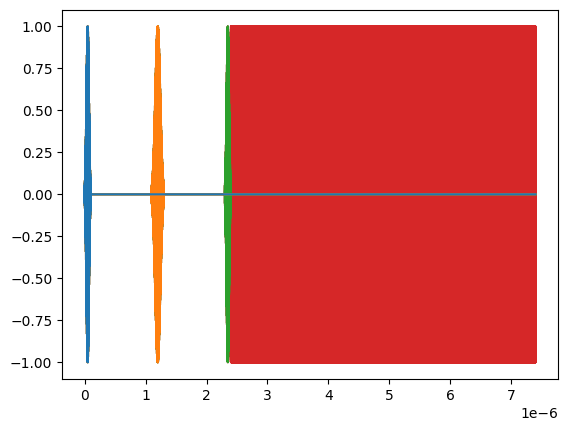

In [11]:
fig = s1.show()

In [14]:
ms = DataChannelManager('LFDQ')

In [15]:
awg.setRefInClockFrequency(10e6)
awg.setRefInClockExternal()  
awg.set_sampleRate(61440000000)
#awg.setSingleWithMarker()
awg.setDualWithMarker()
SCPI_sock_send(awg._session, ':INST:MEM:EXT:RDIV DIV2')
SCPI_sock_send(awg._session, ':TRAC2:MMOD EXT')

In [16]:
awg.getError()

In [17]:
ms.clearAwgChannel()

In [18]:
ms.labelAwgChannel(2,'q1', 240e6)
ms.labelAwgChannel(1,'m1', 70e6, True)

In [19]:
channelData = ms.prepareChannelData(awg, s1, 50e-6)

In [59]:
ms.updateChannelData(channelData,s1,'q1')

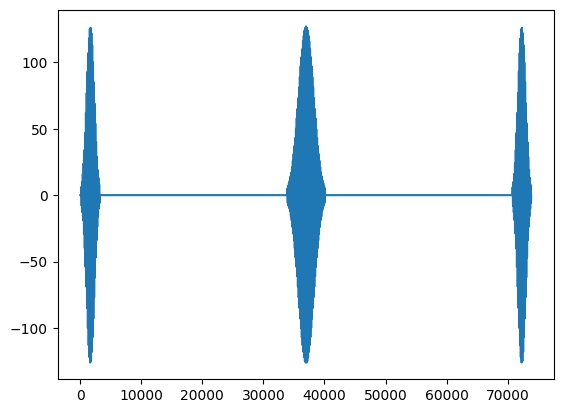

In [20]:
plt.plot(channelData['channels']['q1']['pulse_stream'])

In [23]:
awg.getError()

In [60]:
awg.stop()

In [54]:
awg.start()

In [23]:
awg.clearMemory()

In [24]:
awg.getError()

In [25]:
ms.allocAwgMemory(awg,channelData)

In [54]:
awg.getError()

In [27]:
ms.loadChannelDataToAwg(awg,channelData,'m1')
awg.getError()

In [21]:
ms.loadChannelDataToAwg(awg,channelData,'q1')
awg.getError()

In [22]:
ms.setInstrumentsMarker(awg, channelData)
awg.getError()